# **Project 3**, APS1070 Fall 2020
#### **PCA [20 marks]**
**Deadline: Nov 8, 23:59**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Zian Zhuang
*   **Student number**: 1002449870



We will work on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1-4**.
* The second Covid-19 dataset reports the total number of deaths for each country at the end of each day. We use this dataset in **Part 4**. 
* Finally, we will apply PCA to images using the MNIST dataset of handwritten digits in **Part 5**.

# Part 1: Getting started [3 Marks]

In [1]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Cases.csv',
    index_col=0,
    thousands=','
)

1. Plot the time-series for the `US`, `China`, ` Canada`, and 7 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. **[1]**
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Plot the standardized time-series for the same countries as you chose in `Step 1`. **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. Why does it man if the curve goes up or down? What do negative and positive values mean? **[1]**

Text(0.5, 1.0, 'United Kingdom')

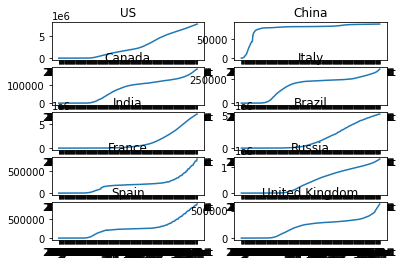

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# get country time and cases data
def Extract_Country_Data (country):
  time = cases_raw.loc[country].index
  cases = cases_raw.loc[country].values
  return time, cases

# subplot 10 countries
fig, axs = plt.subplots(5, 2) # total 10 plots

Time, Cases = Extract_Country_Data ('US')
axs[0, 0].plot(Time, Cases)
axs[0, 0].set_title('US')
Time, Cases = Extract_Country_Data ('China')
axs[0, 1].plot(Time, Cases)
axs[0, 1].set_title('China')
Time, Cases = Extract_Country_Data ('Canada')
axs[1, 0].plot(Time, Cases)
axs[1, 0].set_title('Canada')
Time, Cases = Extract_Country_Data ('Italy')
axs[1, 1].plot(Time, Cases)
axs[1, 1].set_title('Italy')
Time, Cases = Extract_Country_Data ('India')
axs[2, 0].plot(Time, Cases)
axs[2, 0].set_title('India')
Time, Cases = Extract_Country_Data ('Brazil')
axs[2, 1].plot(Time, Cases)
axs[2, 1].set_title('Brazil')
Time, Cases = Extract_Country_Data ('France')
axs[3, 0].plot(Time, Cases)
axs[3, 0].set_title('France')
Time, Cases = Extract_Country_Data ('Russia')
axs[3, 1].plot(Time, Cases)
axs[3, 1].set_title('Russia')
Time, Cases = Extract_Country_Data ('Spain')
axs[4, 0].plot(Time, Cases)
axs[4, 0].set_title('Spain')
Time, Cases = Extract_Country_Data ('United Kingdom')
axs[4, 1].plot(Time, Cases)
axs[4, 1].set_title('United Kingdom')

Text(0.5, 1.0, 'United Kingdom')

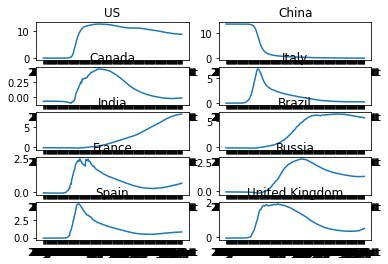

In [3]:
# standardize data
cases_std = pd.DataFrame(StandardScaler().fit_transform(cases_raw.values),
                   index=cases_raw.index,
                   columns=cases_raw.columns)
                   
# repeat step 1 with std data
def Extract_Country_Data_std (country):
  time = cases_std.loc[country].index
  cases = cases_std.loc[country].values
  return time, cases

# subplot 10 countries
fig, axs = plt.subplots(5, 2) # total 10 plots

Time, Cases = Extract_Country_Data_std ('US')
axs[0, 0].plot(Time, Cases)
axs[0, 0].set_title('US')
Time, Cases = Extract_Country_Data_std ('China')
axs[0, 1].plot(Time, Cases)
axs[0, 1].set_title('China')
Time, Cases = Extract_Country_Data_std ('Canada')
axs[1, 0].plot(Time, Cases)
axs[1, 0].set_title('Canada')
Time, Cases = Extract_Country_Data_std ('Italy')
axs[1, 1].plot(Time, Cases)
axs[1, 1].set_title('Italy')
Time, Cases = Extract_Country_Data_std ('India')
axs[2, 0].plot(Time, Cases)
axs[2, 0].set_title('India')
Time, Cases = Extract_Country_Data_std ('Brazil')
axs[2, 1].plot(Time, Cases)
axs[2, 1].set_title('Brazil')
Time, Cases = Extract_Country_Data_std ('France')
axs[3, 0].plot(Time, Cases)
axs[3, 0].set_title('France')
Time, Cases = Extract_Country_Data_std ('Russia')
axs[3, 1].plot(Time, Cases)
axs[3, 1].set_title('Russia')
Time, Cases = Extract_Country_Data_std ('Spain')
axs[4, 0].plot(Time, Cases)
axs[4, 0].set_title('Spain')
Time, Cases = Extract_Country_Data_std ('United Kingdom')
axs[4, 1].plot(Time, Cases)
axs[4, 1].set_title('United Kingdom')

Discuss the trends in the standardized time-series for the US, Canada, and China. Why does it man if the curve goes up or down? What do negative and positive values mean? [1]

Answer: The postive values mean the number of covid cases is above the average of world total cases, the negative values mean the number of covid cases is below the average of world total cases; The trend going up means the covid cases growing rate is above the world average growing rate, the trend going down means the covid cases growing rate is below the world average growing rate. By comparing the graphs, the covid cases in the US increases at a very high rate comparing to the world average from April to Octorber; the covid cases in China is high from January to March and trends toward stable (no increase) in the later months; the covid cases in Canada reaches the increasing rate peak relative to world average around May and is still increasing at a higher rate relative to world average in the rest of the months.

# Part 2: Applying PCA [3 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (265, 265).* **[0.5]**
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.5]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.5]**
4. How many PCs do you need to cover 99\% of the dataset's variance? **[0.5]**

Required at least 4 PCs to cover 99% of dataset's variance

5. Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots). **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

The first few PCs provide majority of characteristices of the tends in different countries. 
 The rest provide characteristics that are not siginificant, such as noise. 
 The linear combinations of first 4 PCs can descirbe arround 99% of the trends in the datasets. 

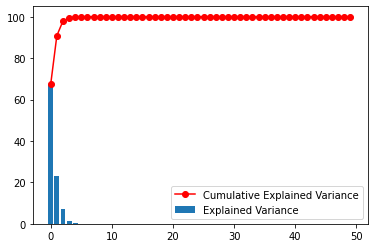

[67.53148737 90.84137079 97.91963412 99.31855519 99.83136531 99.92576373
 99.97196972 99.98584888 99.99262542 99.99484289 99.99667229 99.99776301
 99.99834872 99.99874382 99.99899204 99.9991838  99.99936716 99.99950393
 99.99962245 99.99969551 99.99973992 99.99977877 99.99980935 99.99983477
 99.99985682 99.99987546 99.99989227 99.99990627 99.99991835 99.9999286
 99.99993737 99.99994463 99.99995091 99.99995626 99.99996132 99.99996568
 99.99996934 99.99997265 99.99997566 99.99997817 99.99998057 99.99998285
 99.99998441 99.99998582 99.9999871  99.99998819 99.99998926 99.99999019
 99.99999105 99.99999185]
 Answer: Required at least 4 PCs to cover 99% of dataset's variance.
Answer: The first few PCs provide majority of characteristices of the tends in different countries. 
 The rest provide characteristics that are not siginificant, such as noise. 
 The linear combinations of first 4 PCs can descirbe arround 99% of the trends in the datasets. 


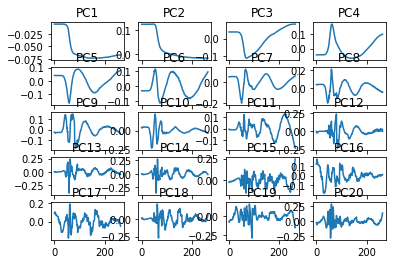

In [4]:
# compute covariance
C = np.cov(cases_std.T)

# compute eigenvalues and eigenvectors
eigenValues, eigenVectors = np.linalg.eigh(C) 

# sort eigenvalues
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

# scree plot for the first 50 PCs
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues[0:50]]
cumExpVar = np.cumsum(expVar)

plt.bar(range(50), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

print(cumExpVar)
print(" Answer: Required at least 4 PCs to cover 99% of dataset's variance.")

# plot first 20 eigenvectors
PC_count = 20   # Number of PCs
W = eigenVectors[:, 0:PC_count]

fig, axs = plt.subplots(5, 4) # total 20 plots
axs[0, 0].plot(W[:,0])
axs[0, 0].set_title('PC1')
axs[0, 1].plot(W[:,1])
axs[0, 1].set_title('PC2')
axs[0, 2].plot(W[:,2])
axs[0, 2].set_title('PC3')
axs[0, 3].plot(W[:,3])
axs[0, 3].set_title('PC4')
axs[1, 0].plot(W[:,4])
axs[1, 0].set_title('PC5')
axs[1, 1].plot(W[:,5])
axs[1, 1].set_title('PC6')
axs[1, 2].plot(W[:,6])
axs[1, 2].set_title('PC7')
axs[1, 3].plot(W[:,7])
axs[1, 3].set_title('PC8')
axs[2, 0].plot(W[:,8])
axs[2, 0].set_title('PC9')
axs[2, 1].plot(W[:,9])
axs[2, 1].set_title('PC10')
axs[2, 2].plot(W[:,10])
axs[2, 2].set_title('PC11')
axs[2, 3].plot(W[:,11])
axs[2, 3].set_title('PC12')
axs[3, 0].plot(W[:,12])
axs[3, 0].set_title('PC13')
axs[3, 1].plot(W[:,13])
axs[3, 1].set_title('PC14')
axs[3, 2].plot(W[:,14])
axs[3, 2].set_title('PC15')
axs[3, 3].plot(W[:,15])
axs[3, 3].set_title('PC16')
axs[4, 0].plot(W[:,16])
axs[4, 0].set_title('PC17')
axs[4, 1].plot(W[:,17])
axs[4, 1].set_title('PC18')
axs[4, 2].plot(W[:,18])
axs[4, 2].set_title('PC19')
axs[4, 3].plot(W[:,19])
axs[4, 3].set_title('PC20')

print("Answer: The first few PCs provide majority of characteristices of the tends in different countries. \n The rest provide characteristics that are not siginificant, such as noise. \n The linear combinations of first 4 PCs can descirbe arround 99% of the trends in the datasets. ")

# Part 3: Data reconstruction [6 Marks]

Create a function that:

*   Accepts a country name as an input.
*   Plots 4 figures:
1.   The standardized time-series for the specified country. **[0.5]**
2.   The incremental reconstruction of the standardized time-series for the specified country in a single plot with the 10 first principal components (10 curves: the first curve a reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[2]**
3.   The residual error of reconstruction for each of the 10 reconstructions with respect to the standardized time-series. **[1]**
4.   The RMSE of reconstruction as a function of number of included components. **[1]**

*   Prints how many PCs are needed so that the RMSE would be less than $1$, $0.1$ and $0.01$. **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


For US : PC required for RMSE < 1 is 3 PC required for RMSE < 0.1 is 5 PC required for RMSE < 0.01 is 8
For Canada : PC required for RMSE < 1 is 0 PC required for RMSE < 0.1 is 3 PC required for RMSE < 0.01 is 7
For China : PC required for RMSE < 1 is 2 PC required for RMSE < 0.1 is 4 PC required for RMSE < 0.01 is 5


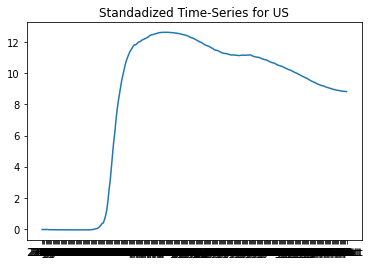

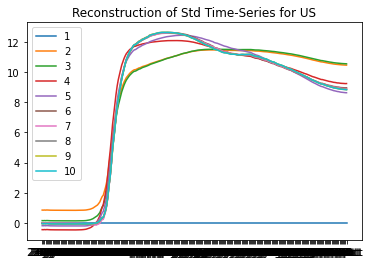

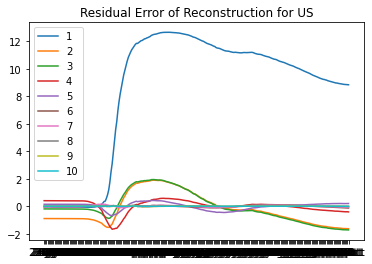

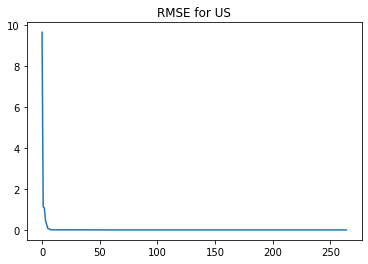

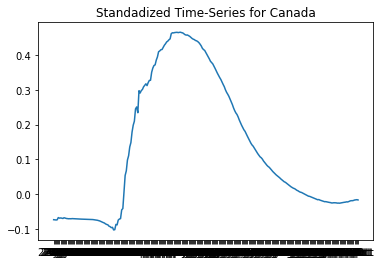

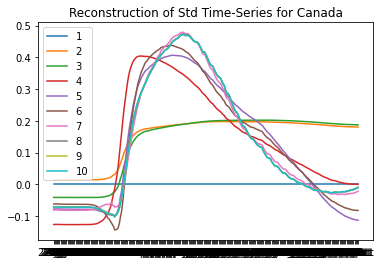

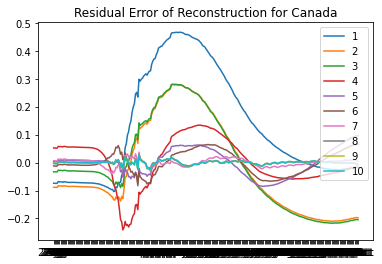

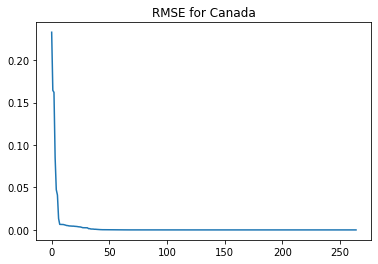

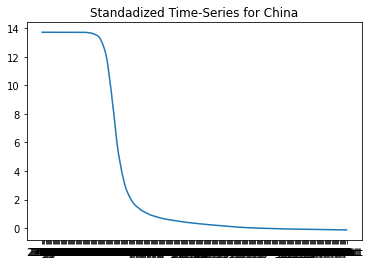

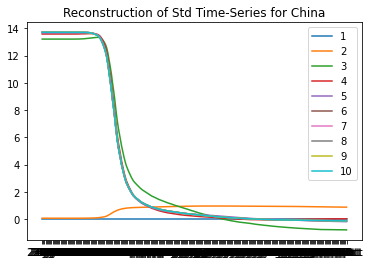

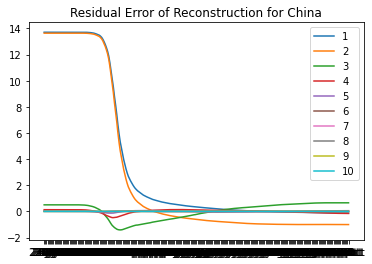

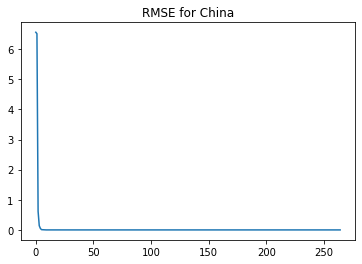

In [5]:
from sklearn.metrics import mean_squared_error
def Data_Reconstruction (country):
    Time = cases_std.loc[country].index
    Cases = cases_std.loc[country].values
    plt.figure() # plot 1
    plt.plot(Time, Cases)
    plt.title('Standadized Time-Series for ' + country)

    plt.figure() # plot 2
    plt.title('Reconstruction of Std Time-Series for ' + country)
    for i in range(10):
      W = eigenVectors[:, 0:i]
      projX = np.dot(cases_std, W) # Projection
      ReconX = np.dot(projX, W.T) # Reconstruction
      cases_std_R = pd.DataFrame(ReconX,
                        index=cases_std.index,
                        columns=cases_std.columns)
      time_R = cases_std_R.loc[country].index
      cases_R = cases_std_R.loc[country].values
      plt.plot(time_R, cases_R)
    plt.legend(labels = [1,2,3,4,5,6,7,8,9,10])

    plt.figure() # plot 3
    plt.title('Residual Error of Reconstruction for ' + country)
    for i in range(10):
      W = eigenVectors[:, 0:i]
      projX = np.dot(cases_std, W) # Projection
      ReconX = np.dot(projX, W.T) # Reconstruction
      cases_std_R = pd.DataFrame(ReconX,
                        index=cases_std.index,
                        columns=cases_std.columns)
      Residual = pd.DataFrame(cases_std.values - ReconX,
                        index=cases_std.index,
                        columns=cases_std.columns)
      time_Res = Residual.loc[country].index
      cases_Res = Residual.loc[country].values
      plt.plot(time_Res, cases_Res)
    plt.legend(labels = [1,2,3,4,5,6,7,8,9,10])

    RMSEx = []
    RMSEy = []
    for i in range(cases_std.shape[1]):
      W = eigenVectors[:, 0:i]
      projX = np.dot(cases_std, W) # Projection
      ReconX = np.dot(projX, W.T) # Reconstruction
      cases_std_R = pd.DataFrame(ReconX,
                        index=cases_std.index,
                        columns=cases_std.columns)
      RMSE = np.sqrt(mean_squared_error(cases_std.loc[country].values, cases_std_R.loc[country].values))
      RMSEx.append(i)
      RMSEy.append(RMSE)
    plt.figure() # plot 4
    plt.title('RMSE for ' + country)
    plt.plot(RMSEx, RMSEy)

    for i in RMSEx: 
      if RMSEy[i] < 0.01: # label RMSE < 0.01
        RMSEy[i] = 'c'
      elif RMSEy[i] < 0.1: # label RMSE < 0.1
        RMSEy[i] = 'b'
      elif RMSEy[i] < 1: # label RMSE < 1
        RMSEy[i] = 'a'
    # print first index of the labels
    print('For', country, ': PC required for RMSE < 1 is', RMSEy.index('a'),'PC required for RMSE < 0.1 is', RMSEy.index('b'), 'PC required for RMSE < 0.01 is',RMSEy.index('c'))

# Test Functions
Data_Reconstruction ('US')
Data_Reconstruction ('Canada')
Data_Reconstruction ('China')

# Part 4: Time-series analysis on death cases [3 Marks]
Here we'll use another dataset for total deaths caused by COVID-19 for different countries. 

Call the function that you designed in *Part 3* with this new dataset. To do that you'll first need to preprocess the data (follow the steps we have in Parts 1 and 2) **[1]** and prepare the data for calling the Part 3 function **[1]**. Test your function with the new dataset, with the `US`, `Canada`, and `China`. **[1]**


In [6]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Dead.csv',
    index_col=0,
    thousands=','
)

For US : PC required for RMSE < 1 is 2 PC required for RMSE < 0.1 is 6 PC required for RMSE < 0.01 is 8
For Canada : PC required for RMSE < 1 is 0 PC required for RMSE < 0.1 is 5 PC required for RMSE < 0.01 is 11
For China : PC required for RMSE < 1 is 2 PC required for RMSE < 0.1 is 4 PC required for RMSE < 0.01 is 5


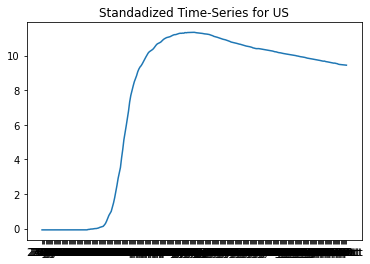

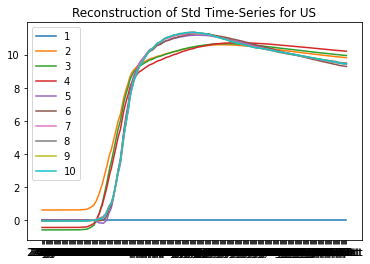

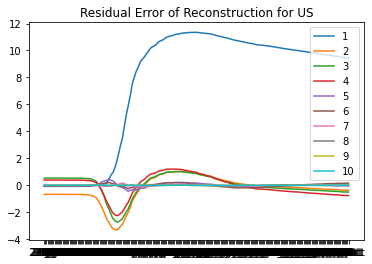

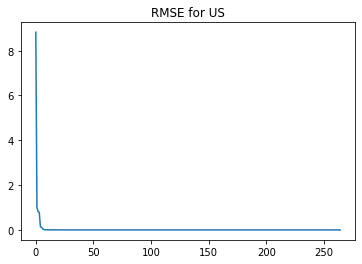

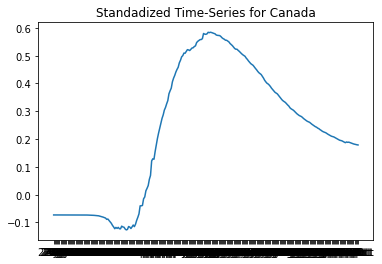

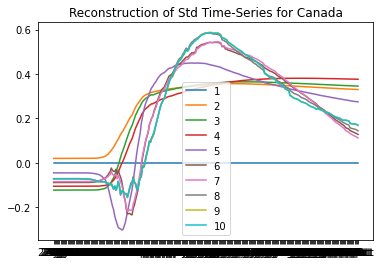

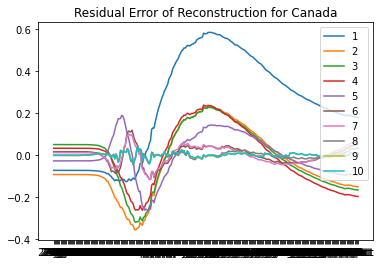

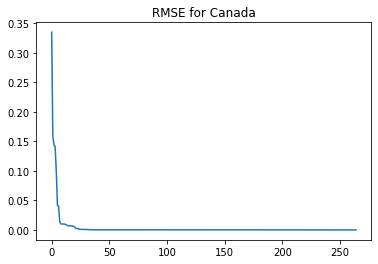

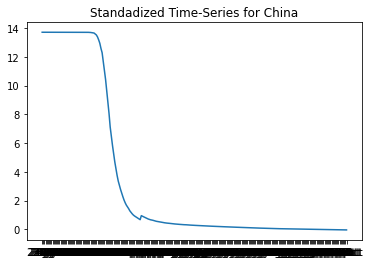

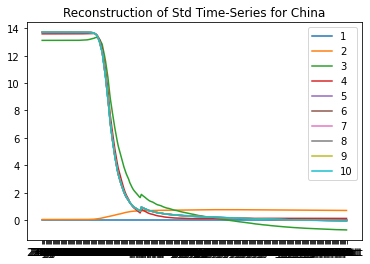

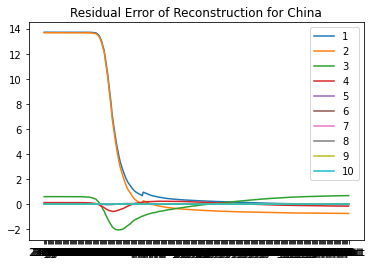

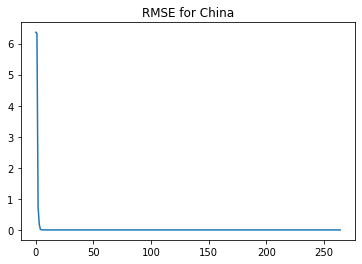

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Preprocess Dataset
# standardize data
cases_std = pd.DataFrame(StandardScaler().fit_transform(death_raw.values),
                   index=death_raw.index,
                   columns=death_raw.columns)

# compute covariance
C = np.cov(cases_std.T)

# compute eigenvalues and eigenvectors
eigenValues, eigenVectors = np.linalg.eigh(C) 

# sort eigenvalues
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

# Test Functions
Data_Reconstruction ('US')
Data_Reconstruction ('Canada')
Data_Reconstruction ('China')

# Part 5: MNIST dataset [5 Marks]
MNIST is a dataset for hand-written digits recognition. 
Each image in MNIST has 28x28 pixels which can be represented in the form of an array with 784 elements. In this part we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Compute the covariance of the dataframe and perform eigendecomposition.  **[1]**
* Plot the first 10 eigenvectors. What trends do you observe? **[1]**

The first few has number shapes meaning that it has majority of the number characteristics, 
 while the rest contain randumness and pick up small features.

* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as $n$ plots of its incremental reconstruction (a first reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[1]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits. **[1]**

After runing for few times, most digits are clear to distinguish if there are are 60 PCs. some extreme cases such as 5 and 6 is hard to distinguish even with this amount if the handwrite is bad (for example, the gap on the bottom left of 5 is too small)

* With that many components, what would be the compression ratio for a dataset with 1000 images? *Hint: compare the dataset size with a case where we only use principal components and projections* **[1]**

with 60 PCs, the compression ratio is 7.324364723467863 X

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

In [9]:
x.shape

(1000, 784)

Label is: 4


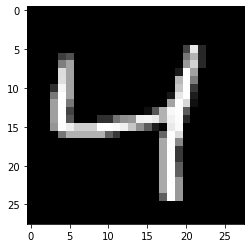

In [10]:
x.shape
import matplotlib.pyplot as plt 
plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show() 

In [11]:
def asRowMatrix(X):
    if len(X) == 0: return np.array([])
    rowMatrix = np.empty((0, X[0].size), dtype = X[0].dtype)
    for img in X:
        rowMatrix = np.vstack((rowMatrix, np.asarray(img).reshape(1, -1)))
    return rowMatrix

def getBasisCountThatPreservesVariance(eigenValues, variance=0.98):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            return idx

def pca(X, y):
    n, d = X.shape
    mu = X.mean(axis=0)
    X = X - mu # standardising data
    
    if n > d:
        C = np.dot(X.T,x) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
    else:
        C = np.dot(X,X.T) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])
    print ('Covariance Matrix: ', C)
    print ("Dim of Full Eigen Vectors", eigenVectors.shape)
            
    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    
    # select based on numOfBasis
    numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
    print('Number of useful eigenBasis are: ', numOfBasis)
    eigenValues = eigenValues[0:numOfBasis].copy()
    eigenVectors = eigenVectors[:, 0:numOfBasis].copy()
    return eigenValues, eigenVectors, mu

In [12]:
XMat = asRowMatrix(x)
meanImage = np.reshape(XMat.mean(axis=0), x[0].shape) # mean image
eigenValues, eigenVectors, mean = pca(XMat, y) # Eigen Decomposition

Covariance Matrix:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Dim of Full Eigen Vectors (784, 784)
Number of useful eigenBasis are:  213


Answer: The first few has number shapes meaning that it has majority of the number characteristics, 
 while the rest contain randumness and pick up small features


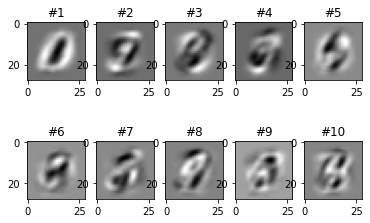

In [13]:
# Plot first 10 eigenvectors
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))
print("Answer: The first few has number shapes meaning that it has majority of the number characteristics, \n while the rest contain randumness and pick up small features")

In [14]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

Label is: 5


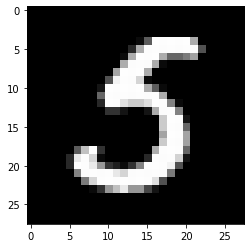

After runing for few times, most digits are clear to distinguish if there are are 60 PCs. some extreme cases such as 5 and 6 is hard to distinguish even with this amount if the handwrite is bad (the gap on the bottom left of 5 is too small)


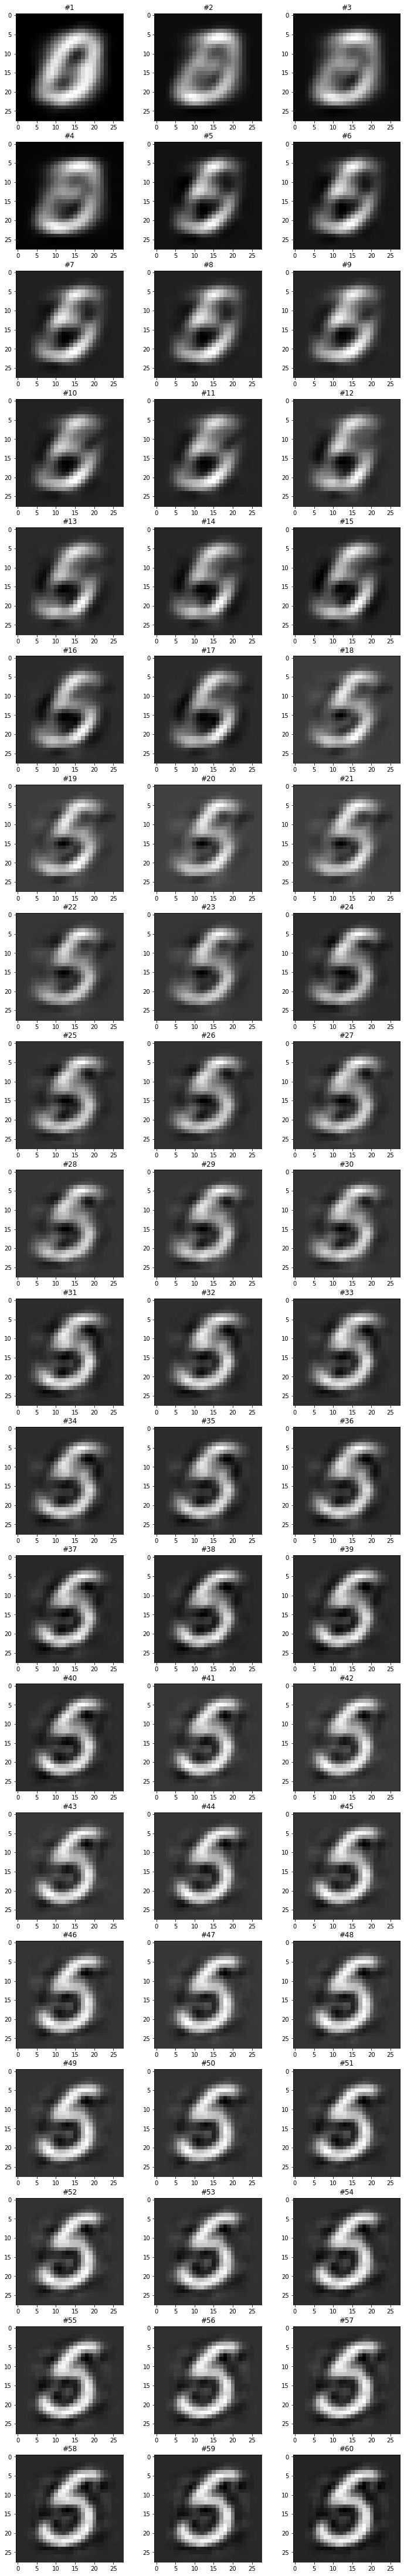

In [15]:
import random
import math
def Image_Reconstruction (n):
    random_idx = random.randint(0,999) # random image index among 1000 images
    plt.imshow(x[random_idx].reshape(28,28)) 
    print ("Label is:", y[random_idx])
    plt.show() # plot a random image

    # create reconstructed images
    COUNT = n # count of first eigenVectors used to reconstruct the image
    reconImages = []
    for numEvs in range (1, COUNT+1):
        P = project(eigenVectors[:, 0:numEvs], x[random_idx].reshape(1, -1), mean)
        R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
        reconImages.append(R.reshape(x[0].shape))

    # plot reconstructed images
    ROWS = math.ceil(COUNT/3)
    fig = plt.figure(figsize=(12, ROWS * 4))
    for i in range(0, COUNT):
        plt.subplot(ROWS, 3, i+1)
        plt.imshow(reconImages[i].reshape(28,28))
        plt.title('#{}'.format(i+1))

Image_Reconstruction (60)
print("After runing for few times, most digits are clear to distinguish if there are are 60 PCs. some extreme cases such as 5 and 6 is hard to distinguish even with this amount if the handwrite is bad (the gap on the bottom left of 5 is too small)")

In [16]:
# Compression ration with 60 PCs
n=60
Compression_ratio = 1000*784/(1000*n + 784*n)
print("with 60 PCs, the compression ratio is", Compression_ratio , "X")

with 60 PCs, the compression ratio is 7.324364723467863 X


# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


